In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from itertools import combinations

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [123]:
N = 5000  #Fixing number of entries

x_1 = np.random.normal(loc = 0, scale = 1, size = N)
x_2 = x_1 + np.random.normal(loc = 0, scale = 3, size = N)
x_3 = (2 * x_1) + x_2

data = pd.DataFrame({'x1' : x_1, 'x2' : x_2, 'x3' : x_3})  #Getting a DataFrame

#Eigenvalues and eigenvectors of covariance matrix
covariance_matrix = np.cov(data.T)
print('Covariance matrix:\n', covariance_matrix)
l, V = la.eig(covariance_matrix)
print('\nEigenvalues:\n', l.real)
print('\nEigenvectors:\n', V)

#SVD method
U, spectrum, Vt = la.svd(data.T)
l_svd = (spectrum ** 2)/(N-1)
V_svd = U

#Checking if both methods lead to the same result
if np.allclose(np.sort(l), np.sort(l_svd), atol = 0.05) == True and np.allclose(np.sort(V), np.sort(V_svd), atol = 0.05) == True:
    print("\nSVD yields to the same result")
else:
    print("\nSVD doesn't yield to the same result")
    
#Getting percent variabilities
percent_variabilities = l.real * 100 / np.sum(l.real)
print("\nPercent of dataset's variability:")

for v in percent_variabilities[np.argsort(-percent_variabilities)]:
    if v > 1e-3:
        print(f'{v:.3f}%')
    else:
        print(f'{v:.3e}%')

Covariance matrix:
 [[ 0.98235531  1.00689264  2.97160326]
 [ 1.00689264 10.0823241  12.09610938]
 [ 2.97160326 12.09610938 18.0393159 ]]

Eigenvalues:
 [ 2.71383826e+01 -6.68201684e-16  1.96561275e+00]

Eigenvectors:
 [[-0.114001   -0.81649658  0.56598331]
 [-0.57918415 -0.40824829 -0.70560545]
 [-0.80718615  0.40824829  0.42636117]]

SVD yields to the same result

Percent of dataset's variability:
93.246%
6.754%
-2.296e-15%


We see one very high percent and the other two that are really small, one in particular is practically zero. This is due to the fact that there is only one indipendent variable, which is $x_1$, and the other two are just derived from $x_1$:

* $x_2$ is just $x_1$ plus another gaussian distribution with same mean and different standard deviation, so we expect low variability with respect to this variable
* $x_3$ is just a combination of $x_1$ and $x_2$ so its variability should be very very low, which is what we observe ($\cal o\left(10^{-15}\right)$)

**Notice**: I supposed $x_3$ was the dimension responsable for the lowest variability in the Principal Components Analysis, but the index referring to the lowest eigenvalue is the second one, so it refers to the second dimension, which is $x_2$. There are two possible explanations for this:

* the order of the eigenvalues does not follow the same order of the dataframe columns (i. e. the order of the dimensions)
* everything I just explained is actually incorrect

Assuming that what I have done up to now is correct (also because, otherwise, I would correct it) i will descard the DataFrame column explicitly referring to the '$x_3$' one and not the second one:

In [124]:
data_reduced = data.drop(['x3'], axis = 1)

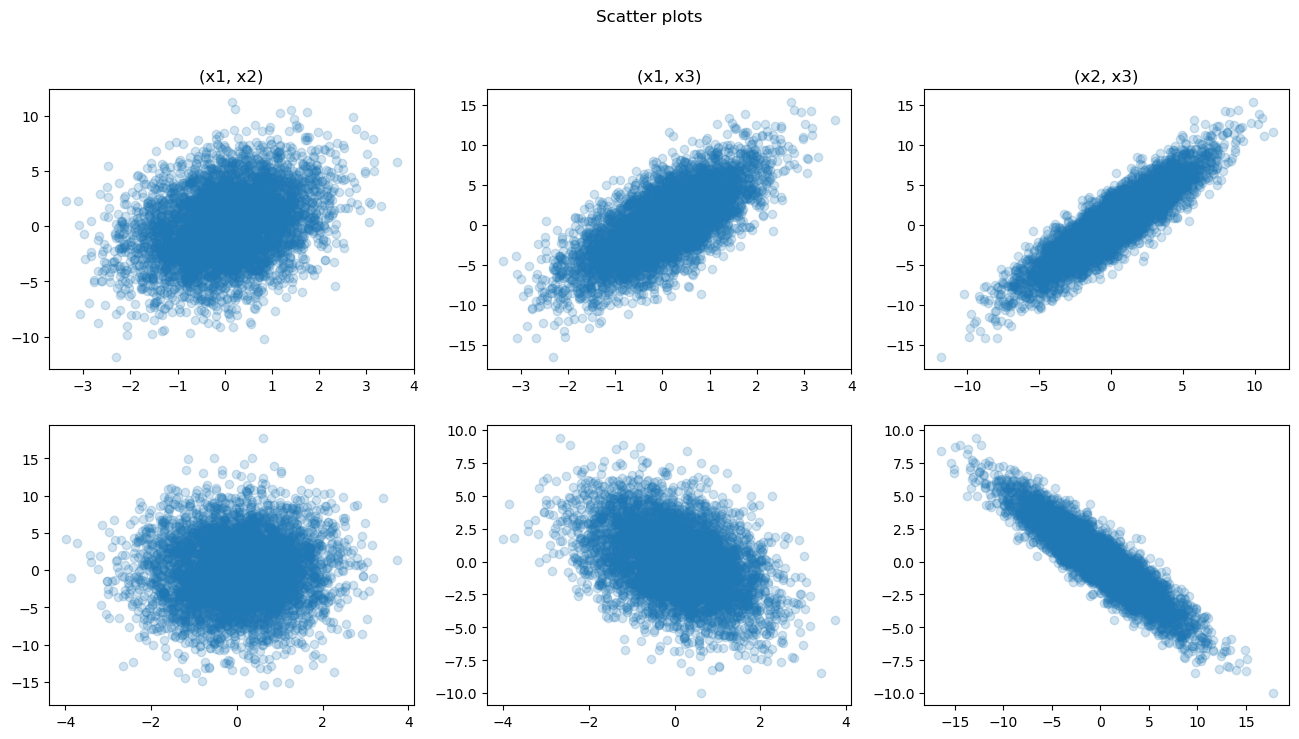

In [153]:
dimensions = ['x1', 'x2', 'x3']

#Ridefining data in the eigenvectors' base by multipling each vector by the eigenvectors matrix
data_newbase = pd.DataFrame(np.dot(V, data.T).T, columns=['x1', 'x2', 'x3'])

#Evaluating all pair combinations of 'x1', 'x2' and 'x3'
combinations = list(combinations(dimensions, 2))

#Plots
fig, ax = plt.subplots(2, 3, figsize=(16,8))

for i, (dim1, dim2) in zip(range(0,3), combinations):
    ax[0,i].set_title(f'({dim1}, {dim2})')
    ax[0,i].scatter(data[dim1], data[dim2], alpha = 0.2)
    ax[1,i].scatter(data_newbase[dim1], data_newbase[dim2], alpha = 0.2)
    
fig.suptitle('Scatter plots')
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 